# Goal
At a high level, we are trying to use datamining to answer, what sorts of twitter activity effect election results.
We will be exploring presidential election wins at the county level using a few metrics
- Percentage of tweets talking about the candidate
- Likes of tweets
- Sentiment of tweets
- Number of retweets on a tweet

the sentiment, likes and number of retweets are rolled up into a composite score called `weightedSentimentOfTweets`.

In [9]:
# get dependencies
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Dataset
Lets take a look at our dataset. This is our data after being cleaned and processed by the main.go script located at `SQLClient/src/internal/dataMiningProcessing`. Each row represents a county that the candidate won

In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster

%matplotlib inline

bidenTweetData = pd.read_csv('../dataMiningDataSets/bidenprocessedTweetData.csv')
bidenTweetData.head()

,county,state,weightedSentimentOfTweets,percentOfTweets
0,Johnson,Iowa,6.70,37.50
1,St. Francis,Arkansas,0.00,0.00
2,Tippecanoe,Indiana,3.40,76.92
3,Anne Arundel,Maryland,6.75,20.53
4,Winchester City,Virginia,-1.50,50.00


Text(0, 0.5, 'percent of Tweets')

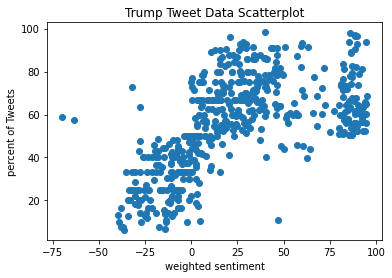

In [57]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster

%matplotlib inline

tTweetData = pd.read_csv('../dataMiningDataSets/trumpprocessedTweetData.csv')
bidenTweetData.head()


tTweetData.columns=['county','state','weightedSentimentOfTweets','percentOfTweets']
plt.scatter(tTweetData.weightedSentimentOfTweets, tTweetData.percentOfTweets)
plt.title('Trump Tweet Data Scatterplot')
plt.xlabel('weighted sentiment')
plt.ylabel('percent of Tweets')



Text(0, 0.5, 'percent of Tweets')

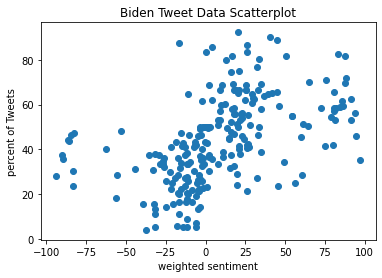

In [58]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster

%matplotlib inline

bidenTweetData = pd.read_csv('../dataMiningDataSets/bidenprocessedTweetData.csv')
bidenTweetData.head()


bidenTweetData.columns=['county','state','weightedSentimentOfTweets','percentOfTweets']
plt.scatter(bidenTweetData.weightedSentimentOfTweets, bidenTweetData.percentOfTweets)
plt.title('Biden Tweet Data Scatterplot')
plt.xlabel('weighted sentiment')
plt.ylabel('percent of Tweets')

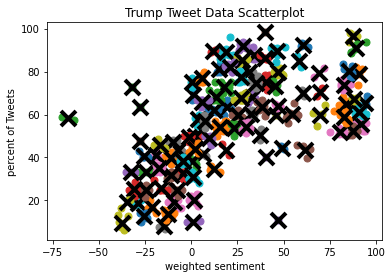

In [86]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster

%matplotlib inline

tTweetData = pd.read_csv('../dataMiningDataSets/trumpprocessedTweetData.csv', usecols = ['weightedSentimentOfTweets', 'percentOfTweets'])


tTweetData.columns=['weightedSentimentOfTweets','percentOfTweets']

dataArray = np.array(tTweetData)

k = 8
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dataArray)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    ds = dataArray[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.title('Trump Tweet Data Scatterplot')
plt.xlabel('weighted sentiment')
plt.ylabel('percent of Tweets')
plt.show()


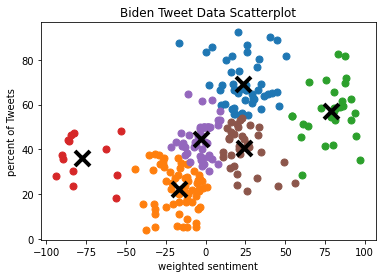

In [85]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster

%matplotlib inline

tTweetData = pd.read_csv('../dataMiningDataSets/bidenprocessedTweetData.csv', usecols = ['weightedSentimentOfTweets', 'percentOfTweets'])


tTweetData.columns=['weightedSentimentOfTweets','percentOfTweets']

dataArray = np.array(tTweetData)

k = 6
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dataArray)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    ds = dataArray[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.title('Biden Tweet Data Scatterplot')
plt.xlabel('weighted sentiment')
plt.ylabel('percent of Tweets')
plt.show()
